# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')
#starting by converting this dataset to a dataframe so we can pull columns of data from it for EDA
df = pd.DataFrame(df)
print(df)

     temperature gender  heart_rate
0           99.3      F        68.0
1           98.4      F        81.0
2           97.8      M        73.0
3           99.2      F        66.0
4           98.0      F        73.0
5           99.2      M        83.0
6           98.0      M        71.0
7           98.8      M        78.0
8           98.4      F        84.0
9           98.6      F        86.0
10          98.8      F        89.0
11          96.7      F        62.0
12          98.2      M        72.0
13          98.7      F        79.0
14          97.8      F        77.0
15          98.8      F        83.0
16          98.3      F        79.0
17          98.2      M        64.0
18          97.2      F        68.0
19          99.4      M        70.0
20          98.3      F        78.0
21          98.2      M        71.0
22          98.6      M        70.0
23          98.4      M        68.0
24          97.8      M        65.0
25          98.0      F        87.0
26          97.8      F     

# Question 1

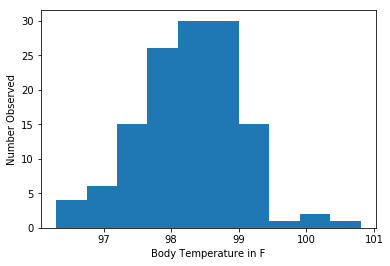

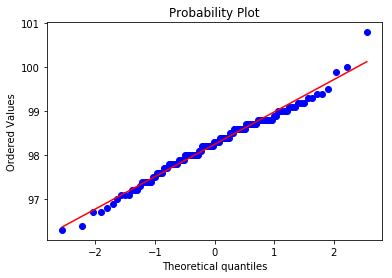

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)


In [13]:
#Now in order to answer Question 1: Is the distribution of body temperatures normal?
#We will need to plot it out using a histogram.
import matplotlib.pyplot as plt
import scipy.stats as stats

#Method 1, most rudimentary, simply plotting and eye-balling the graph to see if it looks "normal"
plt.hist('temperature', data = df)
plt.xlabel('Body Temperature in F')
plt.ylabel('Number Observed')
plt.show()

#Method 2, using a more sophisticated plot to see if the quantile values line up with the theoretical quantile values of normal distribution.
plt.close()
stats.probplot(df['temperature'], dist = 'norm', plot = plt)
plt.show()

#Method 3, using scipy stats, normal test to get a p-value from a 2-sided, chi squared probability for hypothesis test
#Null hypothesis: Sample comes from a normal distribution. 
norm_test = stats.normaltest(df['temperature'])
print(norm_test)


Looking at Method 1: we have a histogram of the data, which does resemble a normal distribution except with a slight left skew. 

Looking at Method 2: we can more clearly see that the data does follow a normal distribution with only a few points going off the theoretical line. 

Looking at Method 3: Our test statistic is 2.703, and our p-value is .2587. In order to reject the null hypothesis that the sample comes from a normal distribution, we would need to have p-value be greater than 2.703 or less than -2.703, which it is not. Therefore we cannot reject the null hypothesis that the sample comes from a normal distribution.

# Question 2

Now on to question 2: Is the sample size large? Are the observations independent?

Yes, the sample size passes the sufficiently large size which is n = 30 + and the observations are all independent as they are different people.

# Question 3

Is the true population mean really 98.6 degrees F?
    a) Would you use a one-sample or two-sample test? Why?
    b) In this situation, is it appropriate to use the  t  or  z  statistic?
    c) Now try using the other test. How is the result be different? Why?

In [14]:
#To answer Question 3:
#We will use the Z-Test statistic. Is there a pythonic way to do all of this? I am basically using python as a calculator here.
import numpy as np
sample_mean = np.mean(df['temperature'])
sample_std = np.std(df['temperature'])
sample_n = len(df['temperature'])
print('sample mean: ' + str(sample_mean) + ' sample stdev: ' + str(sample_std) + ' sample size: ' + str(sample_n))

standard_err = sample_std/np.sqrt(sample_n)
z_stat = (sample_mean - 98.6)/standard_err
print('the Z statistic value is: ' + str(z_stat))

sample mean: 98.24923076923078 sample stdev: 0.7303577789050377 sample size: 130
the Z statistic value is: -5.47592520208


The results above show that the critical Z-value is -5.475, which is in the rejection region because it is less than -1.96, which allows us to reject the null hypothesis that the true population mean is 98.6 based on this set of 130 data we have here.

a) We used a one sample test because we are only comparing one data set to a proposed true mean value, not two data sets against each other.

b) In this situation, it is appropriate to use the z-statistic because our sample size is large(greater than 30).

c)t = +/-1.979 is the test statistic critical value, so it does not change the results. I don't understand this - we can't use a t-test we don't have access to the population standard deviation. This does not make sense. And we did not cover any of this material in the springboard cirriculum for any of this.

# Question 4
Draw a small sample of size 10 from the data and repeat both tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  t  and  z statistic?

In [25]:
rand_set = np.random.choice(df['temperature'], size = 10)
print(rand_set)

[ 97.4  99.4  97.2  98.6  98.7  98.   97.8  98.5  97.2  98.1]


The correct statistic to use right now is the t-statistic because our sample size is only 10. But let us move forward by using both statistics

In [26]:
#Doing Z-statistic first... with alpha = 0.05
sample_n = 10
sample_mean = np.mean(rand_set)
sample_std = np.std(rand_set)
standard_err = sample_std/np.sqrt(sample_n)
print('sample mean: ' + str(sample_mean) + ' sample stdev: ' + str(sample_std) + ' sample size: ' + str(sample_n))
#now to find the Z-statistic, which needs to be greater than 1.96 or less than -1.96 to reject null hypothesis
z_stat = (sample_mean - 98.6)/standard_err
print('the z-statistic value is ' + str(z_stat))
#We would reject the null hypothesis again based on this data set of 10 because z = -2.36 < -1.96

sample mean: 98.09 sample stdev: 0.683300812234 sample size: 10
the z-statistic value is -2.36025126534


In [27]:
#Doing t-statistic now... with alpha = 0.05
pop_std = np.std(df['temperature'])
#s = sample std / population std
s = sample_std/pop_std
standard_err = s/np.sqrt(sample_n)
t_stat = (sample_mean - 98.6)/standard_err
print('the t-statistic value is ' + str(t_stat))

the t-statistic value is -1.72382787181


for n = 10, df = 9, p = 0.025, t = 2.26 or -2.26, therefore we got -1.724 which is greater than -2.26, and we cannot reject the null hypothesis.

This tells me there is a big difference between the z and t test. We got two different answers for the two tests and the proper one to use is the t-test in this situation, which says we cannot reject the null that 98.6 is the true mean based on my random 10 choice of data.

# Question 5
At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

In [28]:
#calculating pop_mean again
pop_mean = np.mean(df['temperature'])
#We can calculate the margin of error knowing z(1/2) @ alpha = 0.05 is 1.96:
margin_err = 1.96*pop_std/np.sqrt(130)
CI_lower = pop_mean - margin_err
CI_upper = pop_mean + margin_err
print('The confidence interval is between: (' + str(CI_lower) + ',' + str(CI_upper) + ')')

The confidence interval is between: (98.1236798044,98.374781734)


According to the calculation above (which is small because we have 130 samples), we should be worried if someone drops below 98.124 or goes above 98.375, which only makes sense based on this data set.

# Question 6 
Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.

In [29]:
#The null hypothesis: There is no difference between males and females in normal temperature. 
#z-value greater than 1.96, less than -1.96 to reject
men_sample = df[df['gender'] == 'M']['temperature']
women_sample = df[df['gender'] == 'F']['temperature']

#calculating men statistics
men_mean = np.mean(men_sample)
men_std = np.std(men_sample)
men_size = len(men_sample)
#calculating women statistics
women_mean = np.mean(women_sample)
women_std = np.std(women_sample)
women_size = len(women_sample)

standard_err = np.sqrt((men_std**2/men_size) + (women_std**2/women_size))
z_stat = (men_mean - women_mean)/ standard_err
print('The z-statistic is: ' + str(z_stat))

The z-statistic is: -2.30322028919


According to the output above, it shows that the z value of -2.303 < -1.96, which is in the rejection region. So based on this data, men and women do not have the same temperature.

In [30]:
import scipy.stats as stats
print(stats.norm.cdf(z_stat)*2)

0.0212664518301
